In [1]:
from methods import *

In [12]:
with open('hudf/hdf-u/table3.dat', 'r') as f:
    lines = f.read().splitlines()

objects = []
for item in lines:
    a = obj(item)
    if a.ra >= RA(3, 32, 38.6) and a.z >= 0.4 and a.z <= 1.3:
        if a.ra < RA(3, 32, 47.8) and a.dec > DEC(-27, 45, 30) and a.dec < DEC(-27, 49, 31):
            objects.append( obj(item))
    
df = dataframe(objects)
df
print(df.to_string())

                 RA           DEC      z              type
30124  03 32 47.762  -27 49 30.84  1.164  Galaxy          
30127  03 32 44.687  -27 49 30.59  0.978  Galaxy          
30137  03 32 41.823  -27 49 29.91  1.024  Galaxy          
30148  03 32 44.755  -27 49 29.90  0.597  Galaxy          
30160  03 32 43.099  -27 49 29.81  0.971  Galaxy          
30170  03 32 44.287  -27 49 29.88  1.197  Galaxy          
30233  03 32 41.432  -27 49 29.39  0.822  Galaxy          
30242  03 32 38.817  -27 49 28.36  0.834  Galaxy          
30257  03 32 43.105  -27 49 27.93  0.942  Galaxy          
30295  03 32 43.589  -27 49 25.96  1.117  Galaxy          
30299  03 32 40.104  -27 49 27.68  1.192  Galaxy          
30311  03 32 41.564  -27 49 25.29  0.933  Galaxy          
30347  03 32 40.969  -27 49 25.54  1.018  Galaxy          
30363  03 32 40.765  -27 49 26.10  0.913  Galaxy          
30375  03 32 42.829  -27 49 23.08  0.969  Galaxy          
30380  03 32 47.640  -27 49 24.81  0.645  Galaxy        

In [22]:
def find(h_ra, m_ra, s_ra, dec_g, dec_m, dec_s, objects):
    res = []
    for item in objects:
        if item.ra >= RA(h_ra, m_ra, s_ra-5) and item.ra <= RA(h_ra, m_ra, s_ra+2):
            if item.dec >= DEC(dec_g, dec_m, dec_s-30) and item.dec <= DEC(dec_g, dec_m, dec_s+30):
                res.append(item)
    return res

res = find(3, 32, 41.76, -27, 46, 19.4, objects)
df = dataframe(res)
df
print(df.to_string())



                 RA           DEC      z              type
35582  03 32 43.028  -27 46 49.14  0.965  Galaxy          
35652  03 32 39.915  -27 46 47.32  1.101  Galaxy  (Uncl!) 
35685  03 32 41.340  -27 46 46.22  1.204  Galaxy          
35740  03 32 39.136  -27 46 44.33  0.994  Galaxy  (Uncl!) 
35771  03 32 38.786  -27 46 48.92  0.539  Galaxy          
35779  03 32 39.582  -27 46 43.52  0.993  Galaxy          
35808  03 32 41.507  -27 46 42.30  1.133  Galaxy          
35993  03 32 42.991  -27 46 37.01  0.957  Galaxy          
36011  03 32 39.228  -27 46 36.12  0.961  Galaxy          
36033  03 32 41.522  -27 46 40.31  1.006  Galaxy          
36103  03 32 40.924  -27 46 34.28  1.126  Galaxy          
36114  03 32 39.868  -27 46 33.54  1.173  Galaxy          
36175  03 32 42.760  -27 46 33.33  0.919  Galaxy          
36188  03 32 43.448  -27 46 34.31  0.671  Galaxy          
36221  03 32 42.817  -27 46 31.75  1.085  Galaxy          
36466  03 32 39.343  -27 46 23.69  0.891  Galaxy        

In [26]:
def find1(h_ra, m_ra, s_ra, dec_g, dec_m, dec_s, objects):
    res = []
    for item in objects:
        if item.ra >= RA(h_ra, m_ra, s_ra-1) and item.ra <= RA(h_ra, m_ra, s_ra+1):
            if item.dec >= DEC(dec_g, dec_m, dec_s-5) and item.dec <= DEC(dec_g, dec_m, dec_s+5):
                res.append(item)
    return res


itt = find1(3, 32, 37.79, -27, 46, 35.2, res)

df = dataframe(itt)
df

,RA,DEC,z,type


In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from skimage.transform import rotate
%matplotlib widget

In [6]:
file = fits.open('hudf/hdf-u/i.fits')
file.info()

Filename: hudf/hdf-u/i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   14390   (10500, 10500)   float32   


In [7]:
#file[0].header

In [8]:
img = file[0].data

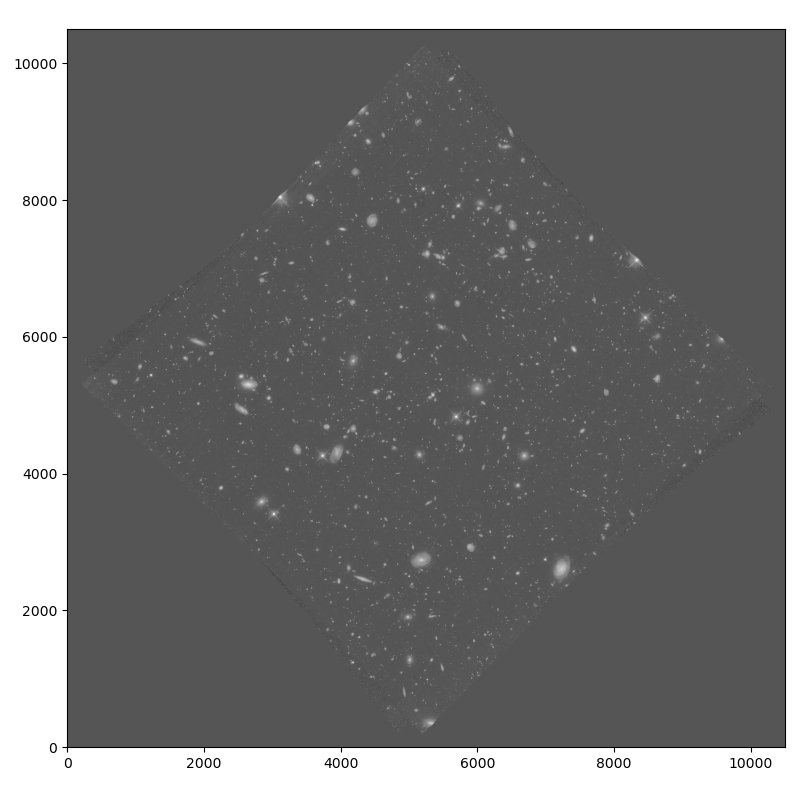

In [9]:
plt.close()
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='Greys_r', norm=colors.SymLogNorm(linthresh=0.001, linscale=0.8, #[4500:5000,3600:4100]
                                              vmin=np.min(img)+1e-3, vmax=np.max(img), base=10), origin='lower')

plt.tight_layout()
plt.show()


In [ ]:
np.min(img), np.max(img)

(-0.010261253, 18.296373)

In [ ]:
import gc

gc.collect()

0

http://server3.wikisky.org/?img_source=IMG_906400:all&ra=3.544107&de=-27.80277&zoom=13&show_box=1&box_ra=3.544107&box_de=-27.80277&box_width=0&box_height=0&box_var_size=1